In [1]:
!pip install svgling  # for graphical visualization

In [2]:

import nltk
nltk.download('wordnet')   # wordnet -> database of english words
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk import pos_tag,RegexpParser

from nltk.corpus import stopwords
import string
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
sent = 'It was a good good work done by him. An amazing play.'

In [4]:
# create a chunk grammer with one regular expression line
'''
According to rule you create, your chunks

start with an optional (?) determiner (DT)
can have any number of (*) of adj (JJ)
end with noun (NN)
'''

# ? : if present print else print remiaing
# * : print all
grammer = "NP : {<DT>?<JJ>*<NN>}"
grammer

'NP : {<DT>?<JJ>*<NN>}'

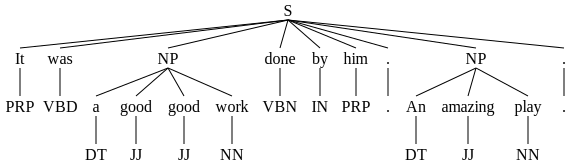

In [5]:
#Creating object of RegexpParser(grammer)
#.parse() is a method of RegexParser

chunk_parser = RegexpParser(grammer)

tags  = pos_tag(word_tokenize(sent))

tree = chunk_parser.parse(tags)
tree

In [6]:
sent1 = 'They were watching the game. It was just thrilling.'

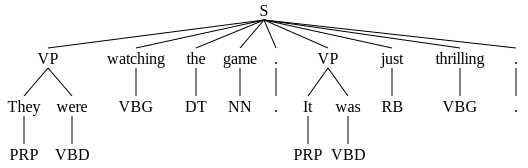

In [7]:
grammer = "VP : {<PRP><VBD>}"

chunk_parser = RegexpParser(grammer)

tags  = pos_tag(word_tokenize(sent1))

tree = chunk_parser.parse(tags)
tree

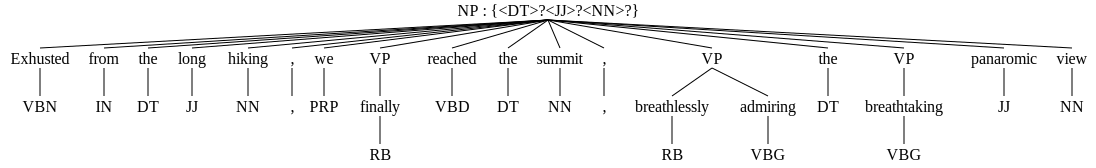

In [8]:
sent = '''Exhusted from the long hiking , we finally reached the summit,
        breathlessly admiring the breathtaking panaromic view
         '''
grammer2 = "VP : {<RB>?<VBG>?}"
grammer3 = "NP : {<DT>?<JJ>?<NN>?}"

tags= pos_tag(word_tokenize(sent))
parser= RegexpParser(grammer2,grammer3)  # passing multiple grammer rules
tree = parser.parse(tags)
tree

In [9]:
help(RegexpParser)

Help on class RegexpParser in module nltk.chunk.regexp:

class RegexpParser(nltk.chunk.api.ChunkParserI)
 |  RegexpParser(grammar, root_label='S', loop=1, trace=0)
 |  
 |  A grammar based chunk parser.  ``chunk.RegexpParser`` uses a set of
 |  regular expression patterns to specify the behavior of the parser.
 |  The chunking of the text is encoded using a ``ChunkString``, and
 |  each rule acts by modifying the chunking in the ``ChunkString``.
 |  The rules are all implemented using regular expression matching
 |  and substitution.
 |  
 |  A grammar contains one or more clauses in the following form::
 |  
 |   NP:
 |     {<DT|JJ>}          # chunk determiners and adjectives
 |     }<[\.VI].*>+{      # strip any tag beginning with V, I, or .
 |     <.*>}{<DT>         # split a chunk at a determiner
 |     <DT|JJ>{}<NN.*>    # merge chunk ending with det/adj
 |                        # with one starting with a noun
 |  
 |  The patterns of a clause are executed in order.  An earlier
